In [1]:
import os
import sklearn
import scipy.spatial.distance
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
#import enchant
from sklearn.neighbors import NearestNeighbors
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import stop_words
from nltk.stem.snowball import RussianStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd

%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
import time
import xml.etree.cElementTree as ET
tree = ET.ElementTree(file="file1.xml")
root = tree.getroot()

In [3]:
articles = []
catalog=root[0][0]
for i in range(50):
    articles.append(catalog[i].text)
catalog=root[0][1]
for i in range(50,100):
    articles.append(catalog[i-50].text)
catalog=root[0][2]
for i in range(100,150):
    articles.append(catalog[i-100].text)
catalog=root[0][3]
for i in range(150,200):
    articles.append(catalog[i-150].text)

In [4]:
len(articles)

200

In [5]:
articles[0]

"Американские производители и владельцы оружия активно поддерживали в президентской гонке Дональда Трампа. Национальная стрелковая ассоциация (NRA) вложила в его предвыборную кампанию 36 миллионов долларов. Вскоре после того как Трамп встал во главе страны, продажи резко пошли вниз, а некоторые компании обанкротились. На бизнес усиливается давление — банки отказываются предоставлять кредиты, а крупные фонды бунтуют против инвестиций в оружие, вынуждая оружейников ужесточать доступ к собственной продукции. Крупнокалиберный провал в американской экономике — в материале «Ленты.ру»\nКандидат от народа\nДональд Трамп стал первым за тридцать лет президентом США, который открыто поддержал Национальную стрелковую ассоциацию (NRA). 29 апреля 2017 года, на сотый день своего правления, он выступил с речью на ее съезде. До него последний раз на такое осмеливался Рональд Рейган в 1983 году. С самого начала предвыборной гонки NRA воспринимала Трампа как своего кандидата и активно его поддерживала. В

In [6]:
tree = ET.ElementTree(file="laba2_file.xml")
root = tree.getroot()

In [7]:
articles_train = []
catalog=root[0][0]
for i in range(50):
    articles_train.append(catalog[i].text)
catalog=root[0][1]
for i in range(50,100):
    articles_train.append(catalog[i-50].text)
catalog=root[0][2]
for i in range(100,150):
    articles_train.append(catalog[i-100].text)
catalog=root[0][3]
for i in range(150,200):
    articles_train.append(catalog[i-150].text)


In [8]:
len(articles_train)

200

In [9]:
articles_train[0]

'американск производител владельц оруж активн поддержива президентск гонк дональд трамп национальн стрелков ассоциац влож предвыборн кампан доллар вскор трамп встал глав стран продаж резк пошл некотор компан обанкрот бизнес усилива давлен банк отказыва предоставля кредит крупн фонд бунт инвестиц оруж вынужд оружейник ужесточа доступ собствен продукц крупнокалиберн прова американск экономик материал кандидат народ дональд трамп перв тридца президент сша открыт поддержа национальн стрелков ассоциац апрел сот правлен выступ реч съезд последн осмелива рональд рейга предвыборн гонк воспринима трамп кандидат активн поддержива частност ассоциац деньг выпуст рекламн ролик выдержа американц предостерега побед кандидат демократическ парт хиллар клинтон американц останут беззащитн поскольк лишат огнестрельн оруж поддержк трамп потрат доллар стал сам больш истор ассоциац вложен политик граждан всерьез обеспоко случа побед клинтон сша запрет свободн продаж ношен оруж ставк выш законопослушн владель

In [10]:
my_stop_words=stop_words.get_stop_words('ru')

vectorizer = TfidfVectorizer(stop_words=my_stop_words)
tfidf_train = vectorizer.fit_transform(articles_train)

print(tfidf_train.shape)

(200, 9384)


In [11]:
tfidf_train

<200x9384 sparse matrix of type '<class 'numpy.float64'>'
	with 35220 stored elements in Compressed Sparse Row format>

In [12]:
valid_inds = []

for i_el, el in enumerate(tfidf_train):
    if el.getnnz() > 0:
        valid_inds.append(i_el)
        
valid_inds = np.asarray(valid_inds)
print(len(valid_inds))
        
tfidf_train_filt = tfidf_train[valid_inds]
print(tfidf_train_filt.shape)

200
(200, 9384)


In [13]:
predictor = NearestNeighbors(n_neighbors=1, algorithm='brute', metric='cosine').fit(tfidf_train_filt)

In [33]:
request = 'когда кончится экономический кризис'

In [34]:
corpus=[]
corpus = request.split()
#corpus.insert(sp)
#     break

print(len(corpus))

4


In [35]:
corpus

['когда', 'кончится', 'экономический', 'кризис']

In [36]:
corpus_stem = []
ps = RussianStemmer() 
for word in corpus: 
    corpus_stem.append(ps.stem(word))
print(corpus_stem)

['когд', 'конч', 'экономическ', 'кризис']


In [37]:
my_string = ' '.join(corpus_stem)

In [38]:
my_string

'когд конч экономическ кризис'

In [39]:
tfidf_test = vectorizer.transform([vectorizer.decode(my_string)])

print(tfidf_test.shape)

(1, 9384)


In [40]:
tfidf_test

<1x9384 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [41]:
vectorizer.vocabulary_

{'американск': 138,
 'производител': 6515,
 'владельц': 817,
 'оруж': 4827,
 'активн': 95,
 'поддержива': 5584,
 'президентск': 6176,
 'гонк': 1410,
 'дональд': 1860,
 'трамп': 8323,
 'национальн': 4106,
 'стрелков': 8013,
 'ассоциац': 236,
 'влож': 834,
 'предвыборн': 6111,
 'кампан': 2827,
 'доллар': 1847,
 'вскор': 1034,
 'встал': 1049,
 'глав': 1358,
 'стран': 7999,
 'продаж': 6461,
 'резк': 7031,
 'пошл': 6056,
 'некотор': 4225,
 'компан': 3059,
 'обанкрот': 4453,
 'бизнес': 427,
 'усилива': 8676,
 'давлен': 1539,
 'банк': 302,
 'отказыва': 4952,
 'предоставля': 6123,
 'кредит': 3235,
 'крупн': 3293,
 'фонд': 8857,
 'бунт': 598,
 'инвестиц': 2630,
 'вынужд': 1158,
 'оружейник': 4829,
 'ужесточа': 8529,
 'доступ': 1912,
 'собствен': 7651,
 'продукц': 6485,
 'крупнокалиберн': 3294,
 'прова': 6416,
 'экономик': 9223,
 'материал': 3625,
 'кандидат': 2837,
 'народ': 4048,
 'перв': 5238,
 'тридца': 8365,
 'президент': 6175,
 'сша': 8110,
 'открыт': 4967,
 'поддержа': 5582,
 'апрел': 187

In [42]:
print(tfidf_test[0])

  (0, 9225)	0.4277531786068206
  (0, 3256)	0.5802419587107467
  (0, 3136)	0.6930703337636647


In [25]:
vectorizer.get_feature_names()[6175]

'президент'

In [26]:
vectorizer.get_feature_names()[137]

'америк'

In [27]:
vectorizer.get_feature_names()[4161]

'невыносим'

In [43]:
distances, inds_pred = predictor.kneighbors(tfidf_test, n_neighbors=10)

In [44]:
distances = np.squeeze(distances)
inds_pred = np.squeeze(inds_pred)

(0, 1)

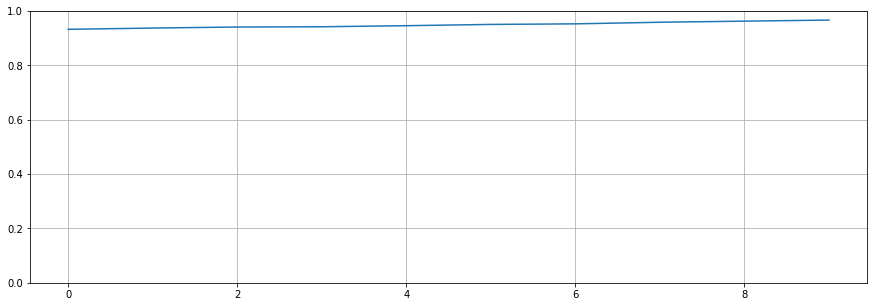

In [45]:
plt.figure(figsize=(15, 5))

plt.plot(distances)
plt.grid(True)
plt.ylim(0, 1)

In [46]:
for i, item in enumerate(np.asarray(articles_train)[valid_inds[inds_pred]], start=1):
    print ('--------------------------- Top-{} ---------------------------'.format(i))
    print (item)
    print ('---------------------------- end -----------------------------')
    print

--------------------------- Top-1 ---------------------------
почт росс котор возглавля никола бывш заместител министр экономическ развит максим орешкин объясн происхожден квартир стоимост миллиард рубл сообщен привод агентств упомянут недвижим приобрет ипотек налогов служб соответств требован российск законодательств учт справк доход генеральн директор направля министерств связ массов коммуникац говор сообщен почтов оператор утвержда средств покупк квартир получ результат продаж квартир москв котор перв сообщ покупк квартир утвержда стоимост недвижим составля миллиард рубл информац издан покупк осуществл ипотек подтверд почт росс материал тем ноябр российск министр взял работ неизвестн таджик помогл влиятельн друз занима квартир располож элитн жил комплекс дан циа минимальн стоимост квартир начина рубл дан рубл занима пост заместител министр экономическ развит сентябр июл июл го назнач пост генеральн директор почт росс должност замминистр квартир площад квадратн метр площад нынешн ква

In [47]:
for i, item in enumerate(np.asarray(articles)[valid_inds[inds_pred]], start=1):
    print ('--------------------------- Top-{} ---------------------------'.format(i))
    print (item)
    print ('---------------------------- end -----------------------------')
    print

--------------------------- Top-1 ---------------------------
«Почта России», которую возглавляет Николай Подгузов — бывший заместитель министра экономического развития Максима Орешкина, объяснила происхождение квартиры стоимостью один миллиард рублей. Сообщение госкомпании приводит агентство Rambler News Service.
«Упомянутая недвижимость приобретена в ипотеку и задекларирована в налоговой службе в соответствии с требованиями российского законодательства. Она также учтена в справке о доходах генерального директора, которая направляется в министерство связи и массовых коммуникаций», — говорится в сообщении госкомпании.
Почтовый оператор утверждает, что средства на покупку квартиры Подгузов получил в результате продажи двух других квартир в Москве. The Insider, которое первым сообщило о покупке квартиры, утверждает, что стоимость недвижимости составляет один миллиард рублей. Также, по информации издания, покупка была осуществлена в ипотеку, что подтвердили и в «Почте России».
МАТЕРИАЛЫ П